<a href="https://colab.research.google.com/github/Aamir33/colab/blob/main/Capstone_01_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

[nltk_data] Downloading package punkt to /voc/work/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /voc/work/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /voc/work/nltk_data...
[nltk_data] Downloading package omw-1.4 to /voc/work/nltk_data...


In [ ]:
data = pd.read_csv("Tesla - Deaths.csv")

In [ ]:
data.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,294.0,2022.0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
1,293.0,2022.0,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
2,292.0,2022.0,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
3,291.0,2022.0,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,...,-,-,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,https://web.archive.org/web/20221222203930/ht...,NaN,NaN,NaN,NaN,NaN
4,290.0,2022.0,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,...,-,-,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,https://web.archive.org/web/20221223203725/ht...,NaN,NaN,NaN,NaN,NaN


#### Perform preliminary data inspection checking for data types, missing values, duplicates.

In [ ]:
missing_values = data.isna()

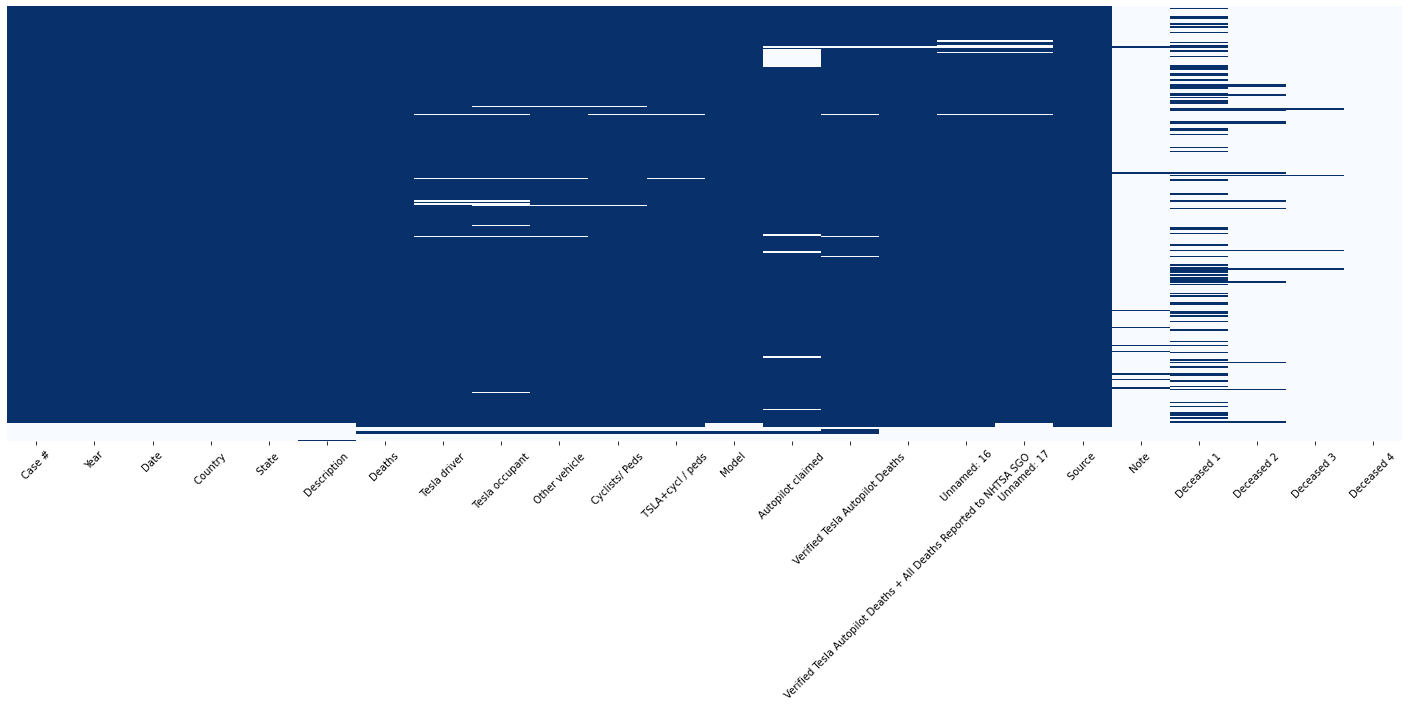

In [ ]:
plt.figure(figsize = (25,8))
sns.heatmap(missing_values, cmap = "Blues_r", cbar=False)
plt.tick_params( left = False,labelleft = False)
plt.xticks(rotation = 45)
plt.show()

#### Remove any columns which might not be relevant for the analysis.


In [ ]:
data.isna().sum()

Case #                                                                   13
Year                                                                     13
Date                                                                     13
 Country                                                                 13
 State                                                                   13
 Description                                                             12
 Deaths                                                                   8
 Tesla driver                                                            13
 Tesla occupant                                                          17
 Other vehicle                                                           12
 Cyclists/ Peds                                                          11
 TSLA+cycl / peds                                                        10
 Model                                                                   11
 Autopilot c

In [ ]:
data.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths ',
       ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ',
       'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ',
       ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 '],
      dtype='object')

## Unnamed: 16 & Unnamed: 17 contain web link which is not useful
## Source : contains web link
## Note : contains additional info
## Deceased 1 2 3 and 4 contain name of the deceased which is irrelevant to the analysis.
## Case # not required
## Year can be derived from date

In [ ]:
drop_columns = ['Case #','Year', 'Unnamed: 16', 'Unnamed: 17', ' Source ', ' Note ', ' Deceased 1 ',
       ' Deceased 2 ', ' Deceased 3 ', ' Deceased 4 ']
data.drop(columns = drop_columns, inplace = True)

In [ ]:
data[' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '].value_counts(dropna = False)

 -       269
  1       21
NaN       11
  2        3
  3        1
  24       1
  27       1
Name:  Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO , dtype: int64

On closer analysis we find that variable *' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO '*  also contain mostly '-' which represent empty or missing hence we remove this column also

In [ ]:
data.drop(columns = ' Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO ', inplace = True)

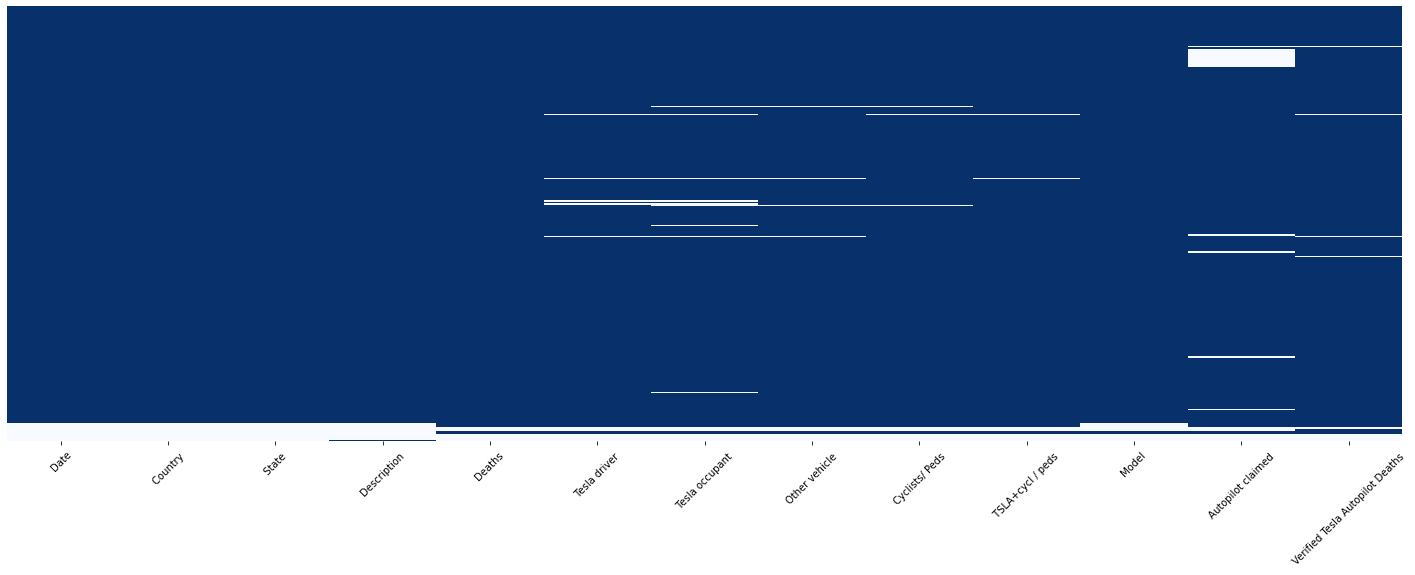

In [ ]:
missing_values = data.isna()
plt.figure(figsize = (25,8))
sns.heatmap(missing_values, cmap = "Blues_r", cbar=False)
plt.tick_params( left = False,labelleft = False)
plt.xticks(rotation = 45)
plt.show()

## We still have missing so we will impute
### missing values may be in other forms also like in this data they are in "-"

In [ ]:
data.head()

,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,Autopilot claimed,Verified Tesla Autopilot Deaths
0,1/17/2023,USA,CA,Tesla crashes into back of semi,1.0,1,-,-,-,1,-,-,-
1,1/7/2023,Canada,-,Tesla crashes,1.0,1,-,-,-,1,-,-,-
2,1/7/2023,USA,WA,"Tesla hits pole, catches on fire",1.0,-,1,-,-,1,-,-,-
3,12/22/2022,USA,GA,Tesla crashes and burns,1.0,1,-,-,-,1,-,-,-
4,12/19/2022,Canada,-,Tesla crashes into storefront,1.0,-,-,-,1,1,-,-,-


For numerical columns replace "-" with 0 and others with their respective numbers

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               294 non-null    object 
 1    Country                           294 non-null    object 
 2    State                             294 non-null    object 
 3    Description                       295 non-null    object 
 4    Deaths                            299 non-null    float64
 5    Tesla driver                      294 non-null    object 
 6    Tesla occupant                    290 non-null    object 
 7    Other vehicle                     295 non-null    object 
 8    Cyclists/ Peds                    296 non-null    object 
 9    TSLA+cycl / peds                  297 non-null    object 
 10   Model                             296 non-null    object 
 11   Autopilot claimed                 281 non-null    object 

In [ ]:
data.columns

Index(['Date', ' Country ', ' State ', ' Description ', ' Deaths ',
       ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' Autopilot claimed ', ' Verified Tesla Autopilot Deaths '],
      dtype='object')

In [ ]:
cols = data.columns[5:]
for col in cols:
  if col != ' Model ':
    print(col)
    data[col] = data[col].fillna("-")
    data[col] = data[col].str.strip()
    data[col] = data[col].replace("-", "0")
    data[col] = data[col].astype(int)
    print(data[col].unique())

 Tesla driver 
[   1    0   28   89  117    6 2014]
 Tesla occupant 
[   0    1    3    2    7   41   48    5 2015]
 Other vehicle 
[   0    1    2    3    4   29  101  130   16 2016]
 Cyclists/ Peds 
[   0    1    2   20   26   46   11 2017]
 TSLA+cycl / peds 
[   1    0    2    3    4   61  149  210   21 2018]
 Autopilot claimed 
[   0    1    2    8   30   38   47 2020]
 Verified Tesla Autopilot Deaths 
[   0    1    2    3   16   19  118 2022   75 2021]


In [ ]:
data.isna().sum()

Date                                 13
 Country                             13
 State                               13
 Description                         12
 Deaths                               8
 Tesla driver                         0
 Tesla occupant                       0
 Other vehicle                        0
 Cyclists/ Peds                       0
 TSLA+cycl / peds                     0
 Model                               11
 Autopilot claimed                    0
 Verified Tesla Autopilot Deaths      0
dtype: int64

In [ ]:
data.dropna(inplace = True)

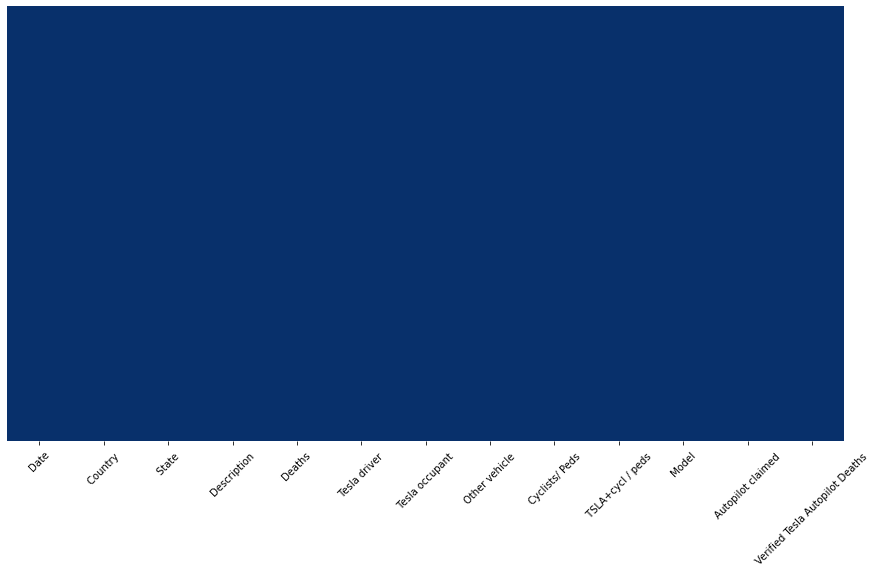

In [ ]:
missing_values = data.isna()
plt.figure(figsize = (15,8))
sns.heatmap(missing_values, cmap = "Blues_r", cbar=False)
plt.tick_params( left = False,labelleft = False)
plt.xticks(rotation = 45)
plt.show()

# Change the variable names in accordance to the python norms

In [ ]:
data.columns = data.columns.str.strip()
data.columns

Index(['Date', 'Country', 'State', 'Description', 'Deaths', 'Tesla driver',
       'Tesla occupant', 'Other vehicle', 'Cyclists/ Peds', 'TSLA+cycl / peds',
       'Model', 'Autopilot claimed', 'Verified Tesla Autopilot Deaths'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.replace(" ", "", regex = True).str.replace("[+/]","_",regex = True)

In [ ]:
data.columns

Index(['Date', 'Country', 'State', 'Description', 'Deaths', 'Tesladriver',
       'Teslaoccupant', 'Othervehicle', 'Cyclists_Peds', 'TSLA_cycl_peds',
       'Model', 'Autopilotclaimed', 'VerifiedTeslaAutopilotDeaths'],
      dtype='object')

In [ ]:
data.rename(columns = {"Autopilotclaimed":"Claimed", "VerifiedTeslaAutopilotDeaths":"VTAD",
                       "Teslaoccupant" : "Tesla_Occupant", "Othervehicle":'Other_Vehicle',
                       "Tesladriver": "Tesla_Driver"}, inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 293
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            294 non-null    object 
 1   Country         294 non-null    object 
 2   State           294 non-null    object 
 3   Description     294 non-null    object 
 4   Deaths          294 non-null    float64
 5   Tesla_Driver    294 non-null    int64  
 6   Tesla_Occupant  294 non-null    int64  
 7   Other_Vehicle   294 non-null    int64  
 8   Cyclists_Peds   294 non-null    int64  
 9   TSLA_cycl_peds  294 non-null    int64  
 10  Model           294 non-null    object 
 11  Claimed         294 non-null    int64  
 12  VTAD            294 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 32.2+ KB



# Exploratory Data Analysis



## Perform an in depth exploratory data analysis. Analysing the number of events by date, per year , per day for each state and country.
- Split the date into year month and day

In [ ]:
data.Date = pd.to_datetime(data.Date)


In [ ]:
data.loc[:,"event_year"] = data.Date.dt.year
data.loc[:,"event_month"] = data.Date.dt.month
data.loc[:,"event_day"] = data.Date.dt.day

## Year wise info

### remove year 2023 as too little info available

In [ ]:
data = data[data.event_year!= 2023]

In [ ]:
vc = data.event_year.value_counts()
vc = vc.sort_index()
vc

2013     2
2014     4
2015     5
2016    15
2017    11
2018    18
2019    46
2020    39
2021    58
2022    93
Name: event_year, dtype: int64

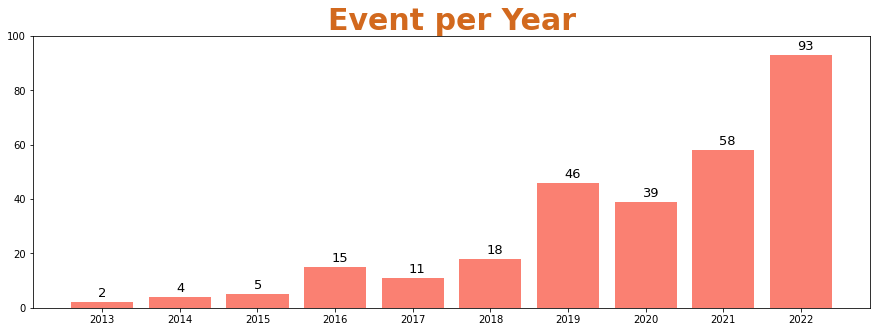

In [ ]:
plt.figure(figsize = (15,5))
plt.bar(height = vc.values, x = vc.index, color = "salmon")
plt.xticks(vc.index, vc.index)
for i in vc.index:
  plt.annotate(vc[i], xy = (i-0.05, vc[i]+2), size = 13)
plt.ylim(0,100)
plt.title("Event per Year", size = 30, color = "chocolate", weight = "heavy")
plt.show()

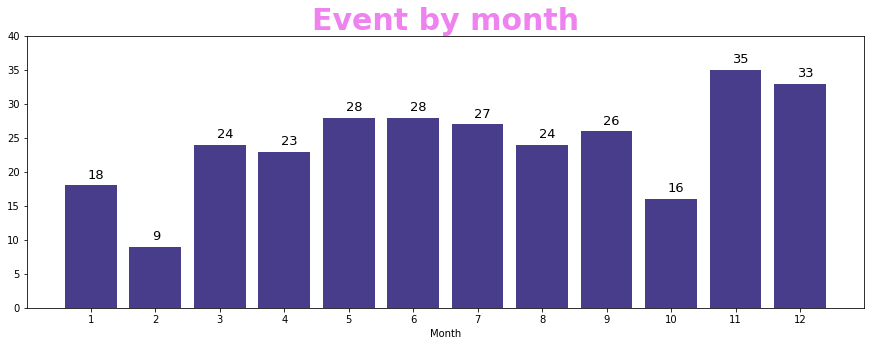

In [ ]:
vc = data.event_month.value_counts()
vc = vc.sort_index()
plt.figure(figsize = (15,5))
plt.bar(height = vc.values, x = vc.index, color = "darkslateblue")
plt.xticks(vc.index, vc.index)
for i in vc.index:
  plt.annotate(vc[i], xy = (i-0.05, vc[i]+1), size = 13)
plt.ylim(0, 5 * round(vc.max()/5) +5)
plt.xlabel("Month")
plt.title("Event by month", size = 30, color = "violet",weight = "heavy")
plt.show()

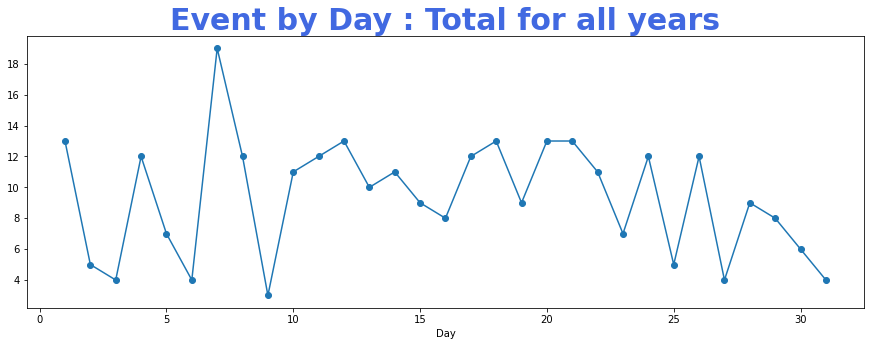

In [ ]:
vc = data.event_day.value_counts()
vc = vc.sort_index()
plt.figure(figsize = (15,5))
plt.plot( vc.index, vc.values)
plt.scatter( vc.index, vc.values)
plt.xlabel("Day")
plt.title("Event by Day : Total for all years", size = 30, color = "royalblue",weight = "heavy")
plt.show()

# Conclusion :
- Tesla's accident volume tends to increase every year
- The number of accidents in November and December is the highest.
- Day wise no concrete info as the distribution pattern is irregular

## However for year wise pattern we should be considering the accidents vs sales data. More Tesla on road will definetly bring a rise in no. of accidents while proportion of accidents might not increase as such.

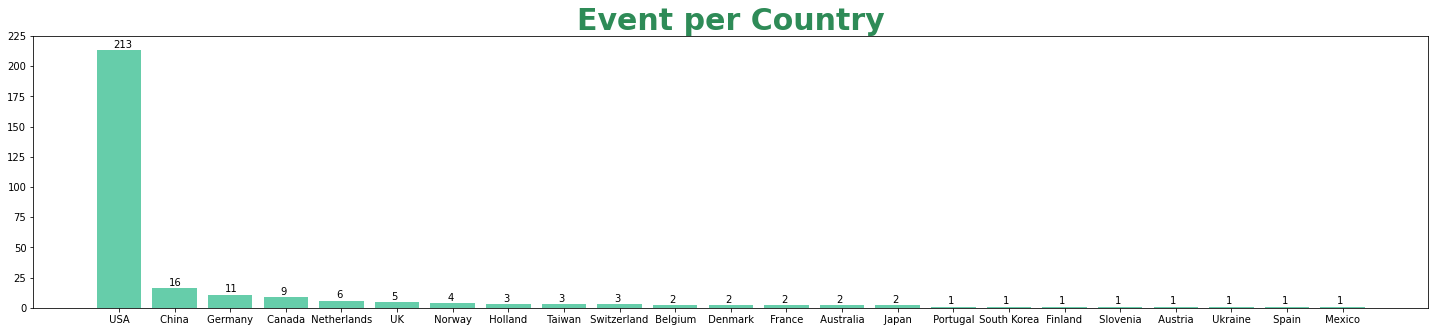

In [ ]:
vc = data.Country.value_counts()
plt.figure(figsize = (25,5))
plt.bar(height = vc.values, x = vc.index, color = "mediumaquamarine")
plt.xticks(vc.index, vc.index)
for i in range(len(vc.index)):
  plt.annotate(vc[i], xy = (i-0.1, vc[i]+2), size = 10)
plt.title("Event per Country", size = 30, color = "seagreen", weight = "heavy")
plt.ylim(0, 25 * round(vc.max()/25))
plt.show()

In [ ]:
data.State = data.State.str.strip()

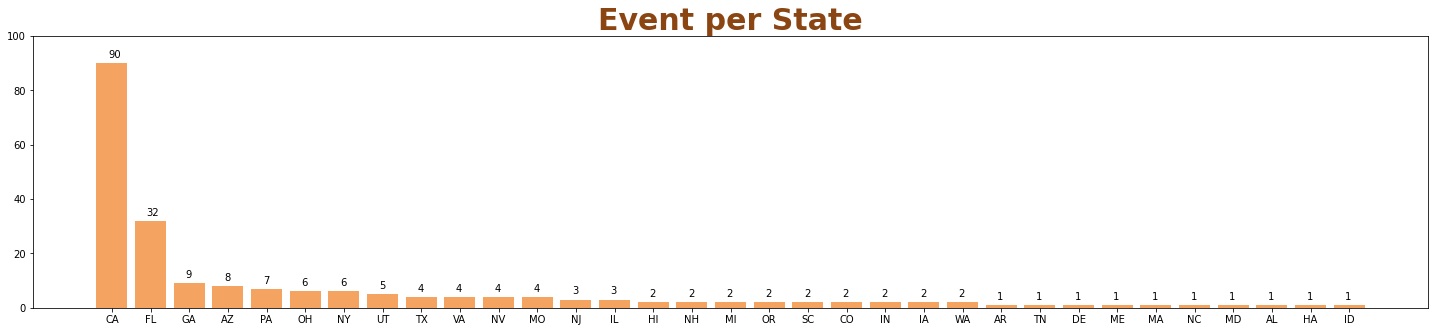

In [ ]:
vc = data.State.value_counts()
vc = vc[vc.index != "-"]
plt.figure(figsize = (25,5))
plt.bar(height = vc.values, x = vc.index, color = "sandybrown")
plt.xticks(vc.index, vc.index)
for i in range(len(vc.index)):
  plt.annotate(vc[i], xy = (i-0.1, vc[i]+2), size = 10)
plt.title("Event per State", size = 30, color = "saddlebrown", weight = "heavy")
plt.ylim(0, 25 * round(vc.max()/25))
plt.show()

## Analyse the different aspects of the death events. For example
> 1. Compare the number of victims(deaths) in each accident.
> 2. In how many events the tesla driver died.
> 3. What is the proportion of events in which 1 or more occupants died ?
> 4. What is the distribution of events in which the vehicle hit a cyclist or a pedestrian ?
> 5. How many times did the accident involve the death of an occupant or driver of a Tesla along with a cyclist or pedestrian ?
> 6. What is the percentage of times tesla hit some other vehicle



In [ ]:
data.columns

Index(['Date', 'Country', 'State', 'Description', 'Deaths', 'Tesla_Driver',
       'Tesla_Occupant', 'Other_Vehicle', 'Cyclists_Peds', 'TSLA_cycl_peds',
       'Model', 'Claimed', 'VTAD', 'event_year', 'event_month', 'event_day'],
      dtype='object')

In [ ]:
col_list = ['Deaths', 'Tesla_Driver','Tesla_Occupant', 'Other_Vehicle', 'Cyclists_Peds', 'TSLA_cycl_peds']

In [ ]:
colr = ['salmon', 'mediumaquamarine', 'mediumpurple', 'goldenrod', 'silver', 'saddlebrown']

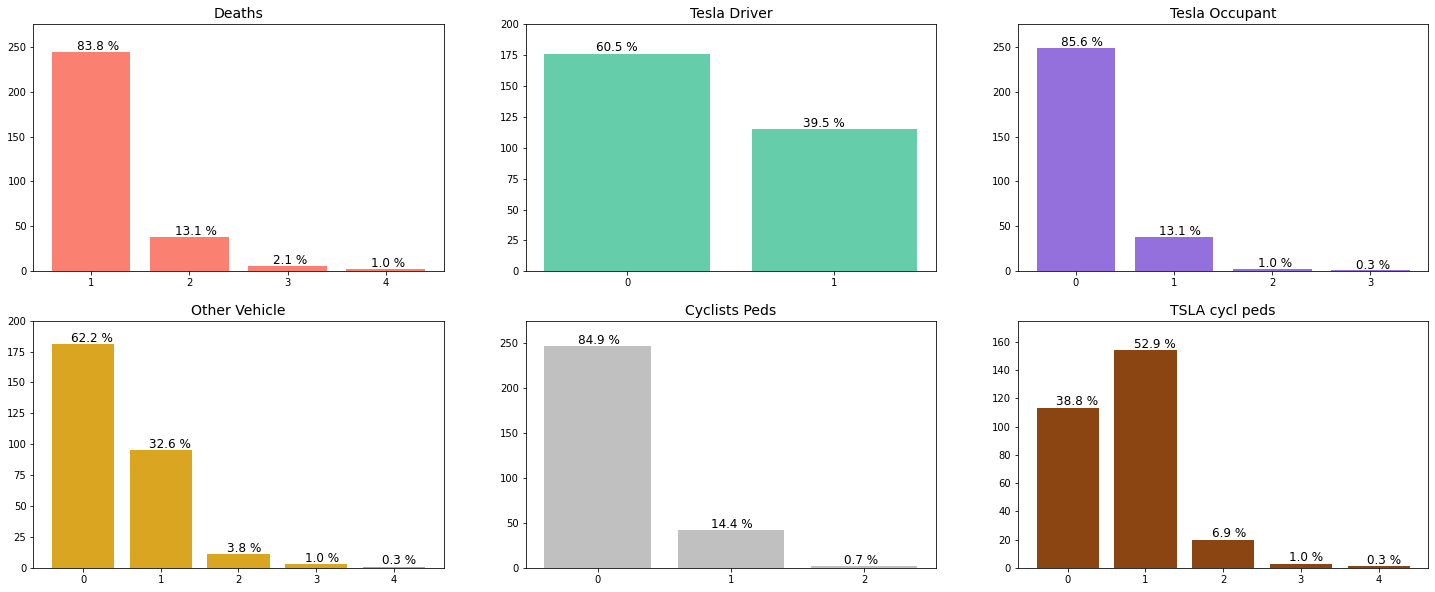

In [ ]:
f,ax = plt.subplots(2,3, figsize = (25,10))
i,j,k = 0,0,0
for col in col_list:
  vc = data[col].value_counts()
  vc = vc.sort_index()
  perc = (vc/vc.sum()*100).round(1)
  #print(vc)
  ax[i,j].bar(x = vc.index, height = vc.values, color = colr[k])
  ax[i,j].set_title(col.replace("_", " "), size = 14)
  ax[i,j].set_xticks(vc.index)
  for l in vc.index:
    #print(l)
    ax[i,j].annotate("{} %".format(perc[l]), xy = (l-0.15,vc[l]+2), size = 12)
    ax[i,j].set_ylim(0,  25 * round(vc.max()/25)+25)
  j += 1
  k += 1
  if j == 3:
    j = 0
    i += 1

## Study the event distribution across models.

In [ ]:
data.Model = data.Model.str.strip()
data.Model = data.Model.replace("-", "0")

# since currently we have only 4 existing models S, X Y and 3 we will analyse them

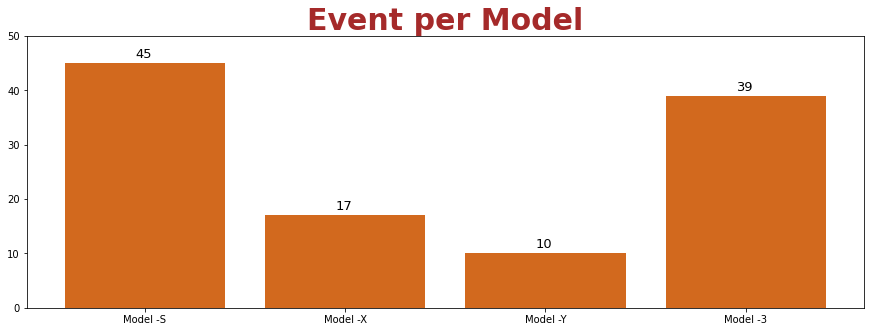

In [ ]:
vc = data.Model.value_counts()
vc = vc[["S", "X", "Y", "3"]]
plt.figure(figsize = (15,5))
plt.bar(height = vc.values, x = vc.index, color = "chocolate")
plt.xticks(vc.index, "Model -"+ vc.index.astype(str))
for i in range(len(vc.index)):
  plt.annotate(vc[i], xy = (i-0.05, vc[i]+1), size = 13)
plt.title("Event per Model", size = 30, color = "brown", weight = "heavy")
plt.ylim(0, 25 * round(vc.max()/25))
plt.show()

# Check the distribution of Verified Tesla autopilot deaths.

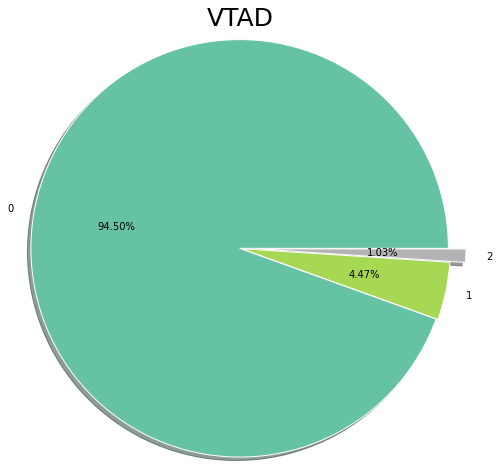

In [ ]:
vc = data.VTAD.value_counts()
plt.figure(figsize = (10,8))
vc.plot.pie(radius = 1.2, autopct = "%1.2f%%", shadow = True, wedgeprops = {'edgecolor':"white"}, cmap = 'Set2',
            explode = [0.001, 0.01,0.1])
plt.ylabel("")
plt.title("VTAD", pad = 5, size = 25)
plt.show()